# 1.0 Imported Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt### IMPORTED LIBRARY
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")

In [2]:
# IMPORTED LIBRARY
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
%config Completer.use_jedi = False

# 2.0 Getting the data

In [3]:
#Load dataset from CSV File using Pandas
data = pd.read_csv('steel_faults.csv')

In [4]:
# Checking the Data from the same file directory')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [5]:
# print the few initial value of the data to make sure its correct
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0


### Info of our data

In [6]:
display(data.describe(include='all'))

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,3.841319
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,2.144175
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,2.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,5.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,6.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,6.000000


### The correlation Matrix between the data

<AxesSubplot:>

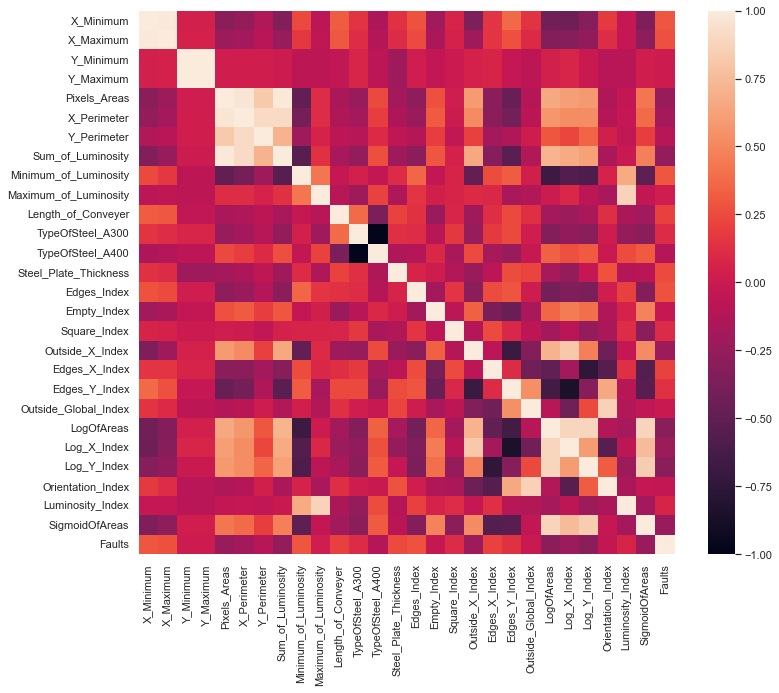

In [7]:
sns.set(rc={'figure.figsize':(12,10)})
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)


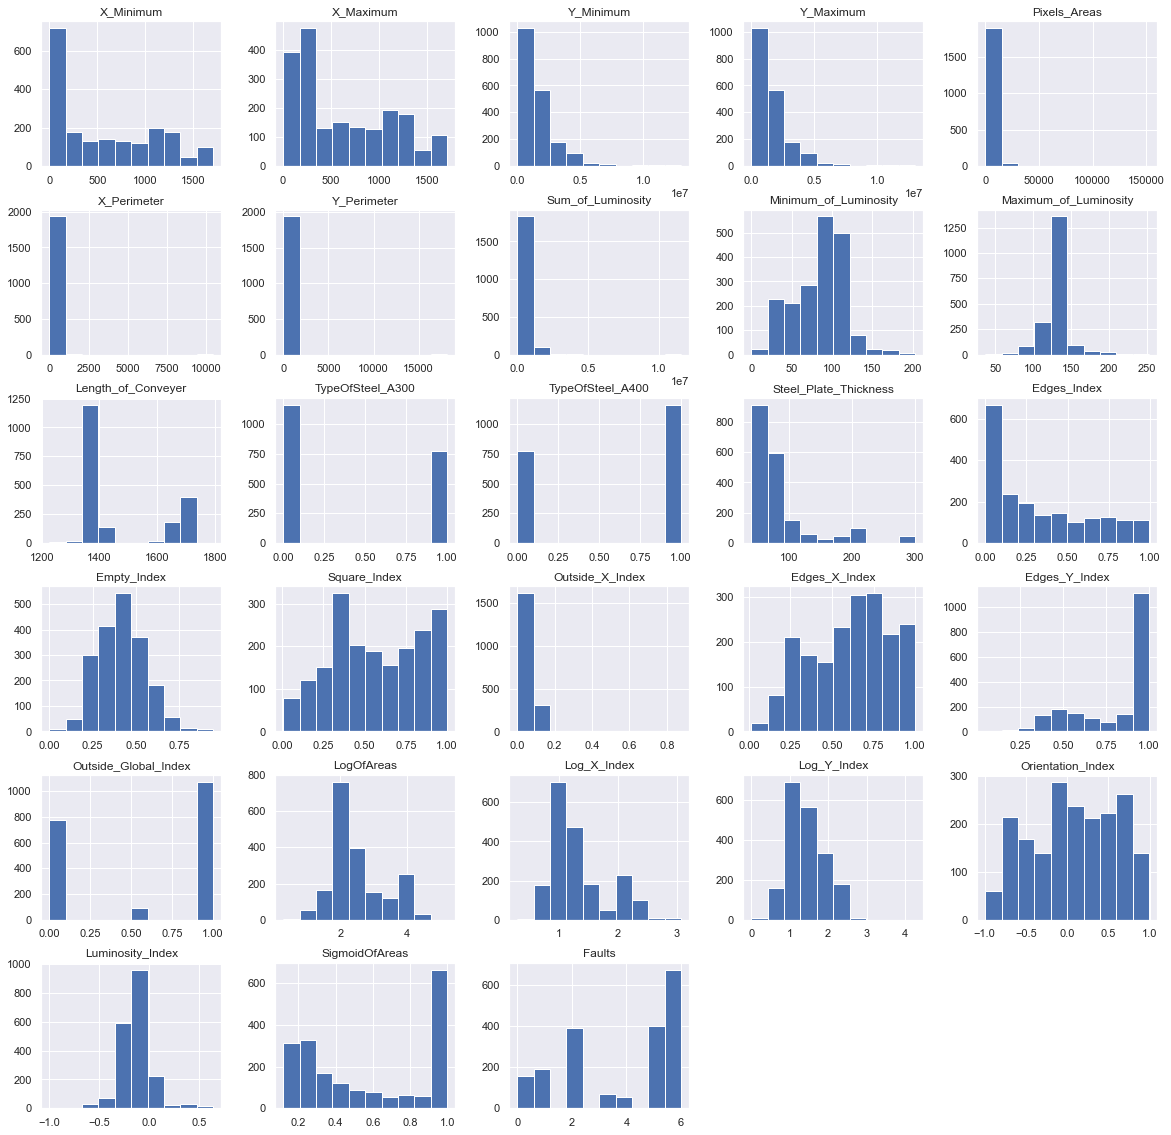

In [8]:
data.hist(figsize=(20,20))  #histogram according to their x variable
plt.show()

# 3.0 Getting the x and y value 

In [9]:
data1 = data.values
y_dataFrame = data[["Faults"]]
features = data1[:,0:27]
x= pd.DataFrame(features)

In [10]:
x

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249.0,277.0,325780.0,325796.0,273.0,54.0,22.0,35033.0,119.0,141.0,...,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254
1937,144.0,175.0,340581.0,340598.0,287.0,44.0,24.0,34599.0,112.0,133.0,...,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173
1938,145.0,174.0,386779.0,386794.0,292.0,40.0,22.0,37572.0,120.0,140.0,...,0.0213,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079
1939,137.0,170.0,422497.0,422528.0,419.0,97.0,47.0,52715.0,117.0,140.0,...,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919


In [11]:
y_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Faults  1941 non-null   int64
dtypes: int64(1)
memory usage: 15.3 KB


In [12]:
y= np.array(y_dataFrame)

In [13]:
y.shape

(1941, 1)

In [14]:
sc=StandardScaler()
X=sc.fit_transform(x)

In [15]:
X.shape

(1941, 27)

### Visual analysis of the correlation between the Factors

In [16]:
corr = data[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']].corr()

<AxesSubplot:>

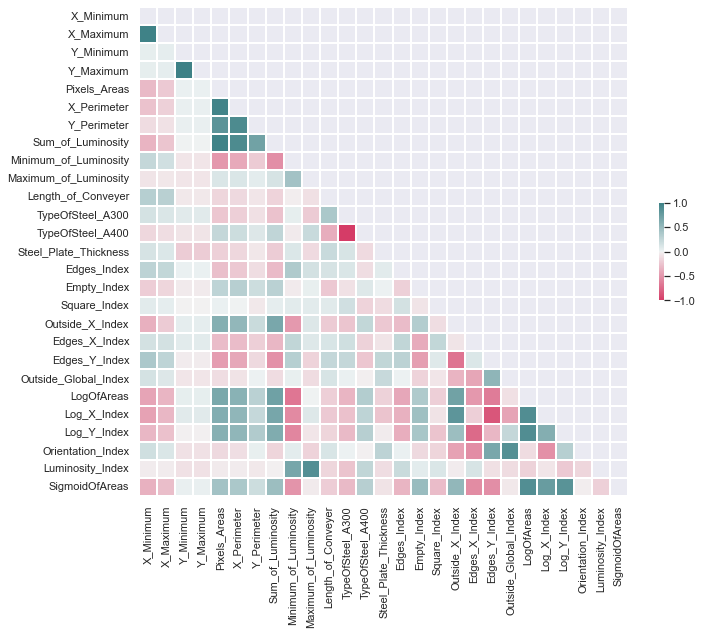

In [17]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1,200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=2, cbar_kws={"shrink": .2}, annot  = False)

# 4.0 Clustering 

In [18]:
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [19]:
data_z = data[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']].apply(zscore)

In [20]:
cluster_range = range( 2, 15) 
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
    # Use scaled data in the fit() function.
  clusters.fit(data_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_data = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

print(clusters_data)

    num_clusters  cluster_errors
0              2    40517.101254
1              3    35992.049313
2              4    31840.590144
3              5    30968.612409
4              6    27077.453057
5              7    25507.101819
6              8    24217.977434
7              9    22785.690128
8             10    21491.836609
9             11    20605.249061
10            12    19660.195189
11            13    18916.701548
12            14    18270.698155


### Elbow Plot

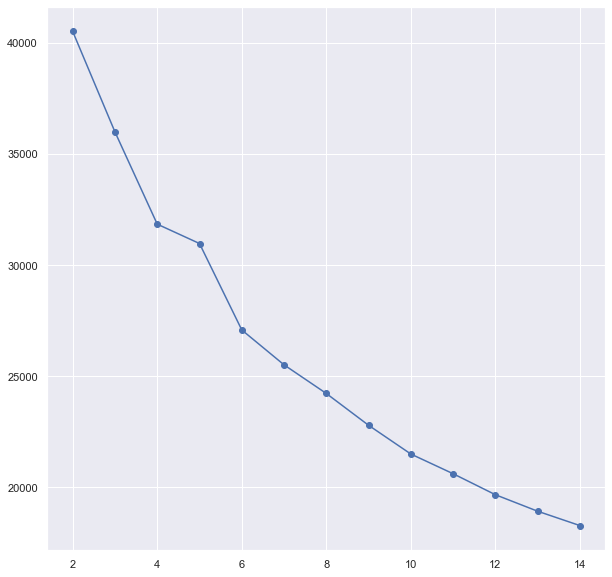

In [21]:
plt.figure(figsize=(10,10))
plt.plot( clusters_data.num_clusters, clusters_data.cluster_errors, marker = "o" )

# 5.0 Model Development and Classification

### Data Preparation 

In [22]:
x = data[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300','TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = data['Faults']

In [23]:
seed_num= 1
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = seed_num, stratify = y)

In [24]:
## Normalization

x_train = x_train.apply(zscore)
x_test = x_test.apply(zscore)

In [25]:
x_train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,...,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03,1.358000e+03
mean,-8.101848e-17,2.166488e-17,1.177262e-17,1.594208e-17,-3.719819e-18,1.616691e-17,-3.638065e-18,-1.291718e-17,3.115042e-16,-8.494269e-17,...,-7.235253e-18,-1.006919e-16,-2.322639e-16,8.927567e-17,5.031975e-17,1.089273e-16,-4.108152e-17,-4.831678e-17,-1.479752e-16,2.972994e-16
std,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,...,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00
min,-1.082996e+00,-1.224436e+00,-9.170420e-01,-9.170593e-01,-3.488481e-01,-3.402223e-01,-1.755771e-01,-3.926463e-01,-2.603321e+00,-4.947545e+00,...,-5.242356e-01,-2.428215e+00,-3.202664e+00,-1.185745e+00,-2.772086e+00,-2.144772e+00,-3.058165e+00,-2.121906e+00,-5.230554e+00,-1.376364e+00
25%,-9.882151e-01,-8.477375e-01,-6.656652e-01,-6.656733e-01,-3.346064e-01,-3.022501e-01,-1.518230e-01,-3.759022e-01,-6.890882e-01,-3.517238e-01,...,-4.436863e-01,-8.279255e-01,-9.232539e-01,-1.185745e+00,-7.310554e-01,-7.080248e-01,-7.134047e-01,-8.165363e-01,-4.432704e-01,-1.000511e+00
50%,-3.112071e-01,-3.312958e-01,-2.487019e-01,-2.487039e-01,-3.185412e-01,-2.671989e-01,-1.280689e-01,-3.578825e-01,1.754039e-01,-1.895184e-01,...,-3.868280e-01,9.496448e-02,5.772568e-01,8.853054e-01,-3.256279e-01,-3.460631e-01,-1.854424e-01,3.392884e-02,-3.111102e-02,-2.120897e-01
75%,9.460933e-01,9.263916e-01,2.976969e-01,2.976943e-01,-1.976178e-01,-8.025904e-02,-1.325745e-02,-2.315919e-01,6.693993e-01,5.133719e-01,...,-1.700557e-01,7.834015e-01,7.984179e-01,8.853054e-01,5.471192e-01,3.844376e-01,7.401210e-01,8.373554e-01,4.522238e-01,1.205734e+00
max,2.215000e+00,2.236736e+00,6.244608e+00,6.244550e+00,2.616364e+01,3.017479e+01,3.575446e+01,2.043342e+01,3.664247e+00,6.623111e+00,...,1.328602e+01,1.601023e+00,7.984179e-01,8.853054e-01,3.367100e+00,3.555148e+00,6.194645e+00,1.813257e+00,5.347742e+00,1.206027e+00


In [26]:
def modelEval(model):
    
    model.fit(x_train, y_train)
    print("\nBest Parameters :",model.best_params_)
    predicted = model.predict(x_test)
    cMatrix = confusion_matrix(y_test, predicted)
    print("\n",cMatrix)
    print("\nModel Accuracy :", round(model.score(x_test,y_test)*100,3))
    print(metrics.classification_report(y_test, predicted))

# 6.0 Model Development

### Logistic Regression

###### For Logistic Regression, an experimentation on HyperParameters 'penalty', 'C', 'tol' and 'solver' was performed.
###### Solver : liblinear is the only algorithm that can be used with both 'l1' and 'l2'

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [28]:
lm = LogisticRegression()
params = { 'penalty': ['l2','l1'],'C': [0.01,0.1,0.5,0.9,1,5,10], 'tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'solver': ['liblinear']}
GSLR = GridSearchCV(lm, params, cv=10)

In [29]:
modelEval(GSLR)


Best Parameters : {'C': 10, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

 [[ 32   2   0   0   0   8   5]
 [  0  39   1   0   1  12   4]
 [  4   0 107   0   0   4   2]
 [  0   0   0  22   0   0   0]
 [  6   0   0   0   7   1   3]
 [ 15   1   1   1   0  86  17]
 [ 27   2  10   3   5  84  71]]

Model Accuracy : 62.436
              precision    recall  f1-score   support

           0       0.38      0.68      0.49        47
           1       0.89      0.68      0.77        57
           2       0.90      0.91      0.91       117
           3       0.85      1.00      0.92        22
           4       0.54      0.41      0.47        17
           5       0.44      0.71      0.54       121
           6       0.70      0.35      0.47       202

    accuracy                           0.62       583
   macro avg       0.67      0.68      0.65       583
weighted avg       0.68      0.62      0.62       583



# 7.0 PCA Transformation 

### Obtain CoVariance Matrix

In [30]:
from sklearn.decomposition import PCA 

In [31]:
x = data[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400',  'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = data['Faults']

x_std = x.apply(zscore)

In [32]:
cov_x = np.cov(x_std, rowvar=False)
print('Covariance matrix of X: \n%s' %cov_x)

Covariance matrix of X: 
[[ 1.00051546  0.98882298  0.04184286  0.04182806 -0.30748017 -0.25907085
  -0.11881858 -0.33922016  0.23775965 -0.07559329  0.31682565  0.14439387
  -0.14439387  0.1366955   0.27821823 -0.19856315  0.06369067 -0.36134567
   0.15485794  0.36809705  0.14735768 -0.42877375 -0.4381696  -0.32701902
   0.17867743 -0.03159404 -0.35543441]
 [ 0.98882298  1.00051546  0.05217423  0.05216203 -0.22551547 -0.1864221
  -0.09018414 -0.24717941  0.16873643 -0.06242372  0.2995446   0.1120666
  -0.1120666   0.10617355  0.24297152 -0.15275894  0.04860005 -0.21504119
   0.14933563  0.27205496  0.09930405 -0.33234036 -0.32417881 -0.26612721
   0.11507868 -0.03901625 -0.28688375]
 [ 0.04184286  0.05217423  1.00051546  1.00051544  0.01767887  0.02385546
   0.02416253  0.007366   -0.06573645 -0.06782004 -0.04923614  0.07520237
  -0.07520237 -0.20774745  0.02132517 -0.04313938 -0.00613804  0.0541925
   0.06611902 -0.03656203 -0.06294377  0.04497497  0.07044258 -0.00844633
  -0.0865414

### Obtain EigenVectors and EigenValues

In [33]:
eigenval, eigenvec = np.linalg.eig(cov_x)

In [34]:
print("Eigen Values for the Variables are :", eigenval.round(2))

Eigen Values for the Variables are : [8.31 3.42 2.71 2.24 1.97 1.62 1.38 1.   0.92 0.78 0.72 0.55 0.39 0.29
 0.24 0.19 0.1  0.06 0.06 0.04 0.01 0.01 0.   0.   0.   0.   0.  ]


In [35]:
pd.DataFrame(eigenval).transpose()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,8.307577,3.421853,2.705271,2.23907,1.972512,1.624511,1.378688,1.000228,0.922206,0.781316,...,0.059342,0.055565,0.044829,0.011966,0.00701,0.001365,0.000492,0.000013,2.937043e-11,2.398970e-17


In [36]:
tot = sum(eigenval)
var_exp = [( i /tot ) * 100 for i in sorted(eigenval, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 30.75295187  43.41995356  53.4343149   61.72289354  69.02472881
  75.03833795  80.14195973  83.84459893  87.25841796  90.15068943
  92.80064502  94.82740608  96.28351537  97.375512    98.26170468
  98.96084088  99.33152928  99.55120145  99.75689016  99.92283884
  99.96713283  99.99308072  99.99813297  99.9999535  100.
 100.         100.        ]


### Plot EigenValues

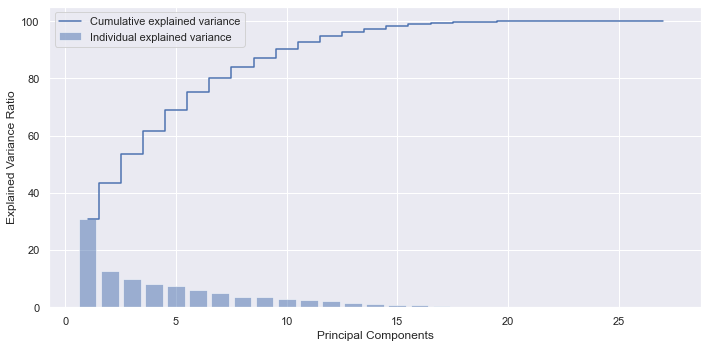

In [37]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenval.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenval.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# 8.0 Splitting the Data set into training and test set

In [38]:
## test_size and random state can change !!!

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= seed_num, stratify =y)

x_train_std = x_train.apply(zscore)
x_test_std = x_test.apply(zscore)

In [39]:
# n_components can change !!!!

x_train_reduced = PCA(n_components=11).fit_transform(x_train_std)
x_test_reduced = PCA(n_components=11).fit_transform(x_test_std)

In [40]:
def PCAmodelEval(model):
    
    model.fit(x_train_reduced, y_train)
    print("\nBest Parameters :",model.best_params_)
    predicted = model.predict(x_test_reduced)
    cMatrix = confusion_matrix(y_test, predicted)
    print("\n",cMatrix)
    print("\nModel Accuracy :", round(model.score(x_test_reduced,y_test)*100,3))
    print(metrics.classification_report(y_test, predicted))
    

# 9.0 Modelling and Classification

## Logistic Regression

#### For Logistic Regression, an experimentation on HyperParameters 'penalty', 'C', 'tol' and 'solver' was performed. 
#### Penalty : l2(Outperforms l1)

In [41]:
lm = LogisticRegression()
params = { 'penalty': ['l2','l1'],'C': [0.01,0.1,0.5,0.9,1,5,10], 'tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'solver': ['liblinear']}
GSLR = GridSearchCV(lm, params, cv=10)

In [42]:
PCAmodelEval(GSLR)


Best Parameters : {'C': 10, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.1}

 [[  1   0   6   7   2   6  25]
 [  0   0   8   0   0  26  23]
 [  2  20  73   0   2   1  19]
 [ 14   0   0   0   0   6   2]
 [  0   0   2   1   1   3  10]
 [  9   4   2   2   4  54  46]
 [  8  14  14   2  10  52 102]]

Model Accuracy : 39.623
              precision    recall  f1-score   support

           0       0.03      0.02      0.02        47
           1       0.00      0.00      0.00        57
           2       0.70      0.62      0.66       117
           3       0.00      0.00      0.00        22
           4       0.05      0.06      0.06        17
           5       0.36      0.45      0.40       121
           6       0.45      0.50      0.48       202

    accuracy                           0.40       583
   macro avg       0.23      0.24      0.23       583
weighted avg       0.37      0.40      0.38       583



### NN

# 10.0 Feature Selection

###### Corellation coeff of 'TypeOSteel A300' and "TypeOSteel A400" is -1 so we can drop one of them

In [43]:
data= data.drop('TypeOfSteel_A400',axis=1)
data

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,6
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,6
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,6
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,6


Imported version = 0.1.55.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (1941, 27)
    Loaded train data. Shape = (1941, 27)
No test data filename given...
##################

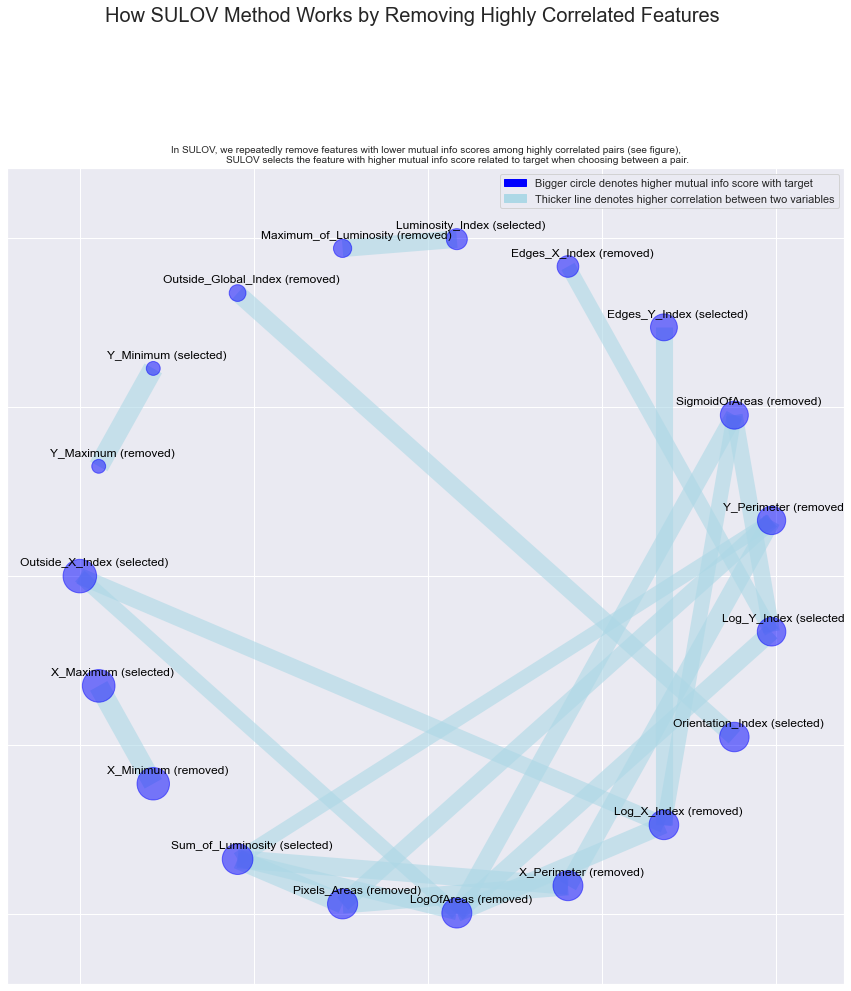

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 15
Final list of selected vars after SULOV = 15
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 15 
    XGBoost version: 1.6.1
Number of booster rounds = 100
        using 15 variables...
            Time taken for regular XGBoost feature selection = 2 seconds
        using 12 variables...
            Time taken for regular XGBoost feature selection = 3 seconds
        using 9 variables...
            Time taken for regular XGBoost feature selection 

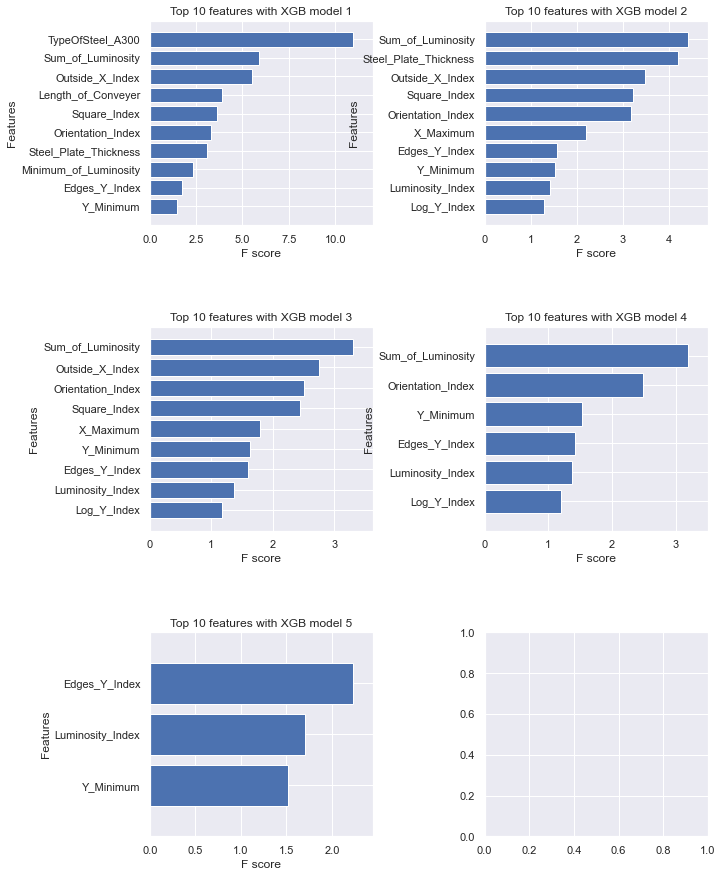

            Total time taken for XGBoost feature selection = 7 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 13 important features:
['TypeOfSteel_A300', 'Sum_of_Luminosity', 'Outside_X_Index', 'Length_of_Conveyer', 'Square_Index', 'Orientation_Index', 'Steel_Plate_Thickness', 'Minimum_of_Luminosity', 'Edges_Y_Index', 'Y_Minimum', 'X_Maximum', 'Luminosity_Index', 'Log_Y_Index']

    Time taken for feature selection = 8 seconds
Returning 2 dataframes: dataname and test_data with 13 important features.


In [44]:
!pip install featurewiz
from featurewiz import featurewiz
target = 'Faults'
features, train = featurewiz(data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [45]:
#Our new importent feature base from featurewiz

print('The important feature is : \n')
features

The important feature is : 



['TypeOfSteel_A300',
 'Sum_of_Luminosity',
 'Outside_X_Index',
 'Length_of_Conveyer',
 'Square_Index',
 'Orientation_Index',
 'Steel_Plate_Thickness',
 'Minimum_of_Luminosity',
 'Edges_Y_Index',
 'Y_Minimum',
 'X_Maximum',
 'Luminosity_Index',
 'Log_Y_Index']

In [46]:
train

,TypeOfSteel_A300,Sum_of_Luminosity,Outside_X_Index,Length_of_Conveyer,Square_Index,Orientation_Index,Steel_Plate_Thickness,Minimum_of_Luminosity,Edges_Y_Index,Y_Minimum,X_Maximum,Luminosity_Index,Log_Y_Index,Faults
0,1,24220,0.0047,1687,0.1818,0.8182,80,76,1.0000,270900,50,-0.2913,1.6435,0
1,1,11397,0.0036,1687,0.2069,0.7931,80,84,0.9667,2538079,651,-0.1756,1.4624,0
2,1,7972,0.0037,1623,0.3333,0.6667,100,99,0.9474,1553913,835,-0.1228,1.2553,0
3,0,18996,0.0052,1353,0.1556,0.8444,290,99,1.0000,369370,860,-0.1568,1.6532,0
4,0,246930,0.0126,1353,0.0662,0.9338,185,37,0.9885,498078,1306,-0.1992,2.4099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0,35033,0.0206,1360,0.5714,-0.4286,40,119,0.7273,325780,277,0.0026,1.2041,6
1937,0,34599,0.0228,1360,0.5484,-0.4516,40,112,0.7083,340581,175,-0.0582,1.2305,6
1938,0,37572,0.0213,1360,0.5172,-0.4828,40,120,0.6818,386779,174,0.0052,1.1761,6
1939,0,52715,0.0243,1360,0.9394,-0.0606,40,117,0.6596,422497,170,-0.0171,1.4914,6


### Our new X and Y data after getting the important feature

In [47]:
X_new = train.drop(['Faults'],axis=1)
y_new = train.Faults.values

In [48]:
X_new

,TypeOfSteel_A300,Sum_of_Luminosity,Outside_X_Index,Length_of_Conveyer,Square_Index,Orientation_Index,Steel_Plate_Thickness,Minimum_of_Luminosity,Edges_Y_Index,Y_Minimum,X_Maximum,Luminosity_Index,Log_Y_Index
0,1,24220,0.0047,1687,0.1818,0.8182,80,76,1.0000,270900,50,-0.2913,1.6435
1,1,11397,0.0036,1687,0.2069,0.7931,80,84,0.9667,2538079,651,-0.1756,1.4624
2,1,7972,0.0037,1623,0.3333,0.6667,100,99,0.9474,1553913,835,-0.1228,1.2553
3,0,18996,0.0052,1353,0.1556,0.8444,290,99,1.0000,369370,860,-0.1568,1.6532
4,0,246930,0.0126,1353,0.0662,0.9338,185,37,0.9885,498078,1306,-0.1992,2.4099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0,35033,0.0206,1360,0.5714,-0.4286,40,119,0.7273,325780,277,0.0026,1.2041
1937,0,34599,0.0228,1360,0.5484,-0.4516,40,112,0.7083,340581,175,-0.0582,1.2305
1938,0,37572,0.0213,1360,0.5172,-0.4828,40,120,0.6818,386779,174,0.0052,1.1761
1939,0,52715,0.0243,1360,0.9394,-0.0606,40,117,0.6596,422497,170,-0.0171,1.4914


In [49]:
y_new = train[["Faults"]]
y_new= np.array(y_new)
y_new.shape

(1941, 1)

### Splitting the dataset to train and test

In [50]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_new)
X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_new, y_new, test_size= 0.3,random_state= seed_num)
print(X_train_feature.shape)
print(y_train_feature.shape)

(1358, 13)
(1358, 1)


## Reapplying the Logistic Regression

In [51]:
def FeamodelEval(model):
    
    model.fit(X_train_feature, y_train_feature)
    print("\nBest Parameters :",model.best_params_)
    predicted = model.predict(X_test_feature)
    cMatrix = confusion_matrix(y_test_feature, predicted)
    print("\n",cMatrix)
    print("\nModel Accuracy :", round(model.score(X_test_feature,y_test_feature)*100,3))
    print(metrics.classification_report(y_test_feature, predicted))

In [52]:
lm = LogisticRegression()
params = { 'penalty': ['l2','l1'],'C': [0.01,0.1,0.5,0.9,1,5,10], 'tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'solver': ['liblinear']}
GSLR = GridSearchCV(lm, params, cv=10)

In [53]:
FeamodelEval(GSLR)


Best Parameters : {'C': 10, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

 [[ 19   1   0   1   0   3  23]
 [  1  47   4   0   0   0   4]
 [  0   0 103   1   0   1   6]
 [  0   0   0  20   0   0   1]
 [  0   0   0   0   7   0   7]
 [  2   1   2   1   0  76  45]
 [  9  10  10   2   1  39 136]]

Model Accuracy : 69.983
              precision    recall  f1-score   support

           0       0.61      0.40      0.49        47
           1       0.80      0.84      0.82        56
           2       0.87      0.93      0.90       111
           3       0.80      0.95      0.87        21
           4       0.88      0.50      0.64        14
           5       0.64      0.60      0.62       127
           6       0.61      0.66      0.63       207

    accuracy                           0.70       583
   macro avg       0.74      0.70      0.71       583
weighted avg       0.70      0.70      0.69       583



## Neural Network

In [54]:
#To avoid any accident overwrite form above, thus we reread the data
df_neural= pd.read_csv('steel_faults.csv')
y_neural = df_neural['Faults']
X_neural = df_neural.drop(columns=['Faults']).values # drop price and convert to numpy array
y_neural = y_neural.values # convert to numpy array
#y_report =y
#y = tf.keras.utils.to_categorical(y)
print(X_neural.shape)
print(y_neural.shape)
print(y_neural)

(1941, 27)
(1941,)
[0 0 0 ... 6 6 6]


In [55]:
scaler = MinMaxScaler()
X_neural = scaler.fit_transform(X_neural)

In [56]:
#splitting data set for neural network

seed_num = 0
X_train_neural, X_test_neural, y_train_neural, y_test_neural = train_test_split(X_neural, y_neural, test_size=0.2,random_state=seed_num)
X_train_neural, X_val_neural, y_train_neural, y_val_neural = train_test_split(X_train_neural, y_train_neural, test_size=0.1, random_state=seed_num)

y_train_neural= tf.keras.utils.to_categorical(y_train_neural)
#y_test= tf.keras.utils.to_categorical(y_test)
print(X_train_neural.shape)
print(X_val_neural.shape)
print(X_test_neural.shape)
print(y.shape)

(1396, 27)
(156, 27)
(389, 27)
(1941,)


In [57]:
#creating the neural network layer
l2 = tf.keras.Sequential
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(27,)),
tf.keras.layers.Dense(20, activation='relu', dtype='float64',kernel_regularizer='l2'), # apply l2 - use string or l2
#tf.keras.layers.Dropout(0.3),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(7, activation='sigmoid', dtype='float64',kernel_regularizer='l2')
])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                560       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 7)                 147       
                                                                 
Total params: 787
Trainable params: 747
Non-trainable params: 40
_________________________________________________________________


In [59]:
#prediction
predictions = model(X_train_neural[:1]).numpy()
predictions

array([[0.33466757, 0.54982334, 0.49443233, 0.5666969 , 0.68248623,
        0.46067692, 0.39966553]])

In [60]:
loss_fn_neural = tf.keras.losses.CategoricalCrossentropy()

In [61]:
 model.compile(optimizer='adam',loss=loss_fn_neural,metrics=['accuracy'])

In [62]:
#training the model
model.fit(X_train_neural, y_train_neural, batch_size=64, epochs=200)

Epoch 1/200
22/22 [==============================] - 1s 2ms/step - loss: 2.5168 - accuracy: 0.1497
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 2.1687 - accuracy: 0.3066
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 1.9406 - accuracy: 0.4033
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 1.7744 - accuracy: 0.4391
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 1.6727 - accuracy: 0.4850
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 1.5906 - accuracy: 0.5122
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 1.5222 - accuracy: 0.5609
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 1.4663 - accuracy: 0.5759
Epoch 9/200
22/22 [==============================] - 0s 2ms/step - loss: 1.4148 - accuracy: 0.5974
Epoch 10/200
22/22 [==============================] - 0s 2ms/step - loss: 1.3692 - accuracy: 0.6203
Epoch 11/

22/22 [==============================] - 0s 2ms/step - loss: 0.7544 - accuracy: 0.7643
Epoch 84/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7484 - accuracy: 0.7629
Epoch 85/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7502 - accuracy: 0.7586
Epoch 86/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7527 - accuracy: 0.7514
Epoch 87/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7420 - accuracy: 0.7708
Epoch 88/200
22/22 [==============================] - 0s 1ms/step - loss: 0.7476 - accuracy: 0.7622
Epoch 89/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7387 - accuracy: 0.7600
Epoch 90/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7478 - accuracy: 0.7557
Epoch 91/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7356 - accuracy: 0.7586
Epoch 92/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7384 - accuracy: 0.7665
Epoch 93/200


22/22 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.7765
Epoch 165/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.7715
Epoch 166/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.7801
Epoch 167/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.7779
Epoch 168/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.7672
Epoch 169/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.7744
Epoch 170/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.7708
Epoch 171/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.7708
Epoch 172/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.7765
Epoch 173/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.7593
Epoc

In [63]:
y_pred_neural=np.argmax(model.predict(X_test_neural), axis=1)
y_test_neural.shape

13/13 [==============================] - 0s 2ms/step


(389,)

In [64]:
print("Below is the accuracy of the neural network")
print("Precission can be more higher if the epoch is higher")
print(accuracy_score(y_test_neural, y_pred_neural))
print("\n Confusion Matrix")
print(confusion_matrix(y_test_neural, y_pred_neural))
print("\n \n")
print(classification_report(y_test_neural, y_pred_neural))


Below is the accuracy of the neural network
Precission can be more higher if the epoch is higher
0.7532133676092545

 Confusion Matrix
[[25  2  0  0  2  3  8]
 [ 0 34  0  0  0  0  5]
 [ 0  0 71  2  0  4  1]
 [ 0  0  0 11  0  1  0]
 [ 0  0  0  0  7  1  2]
 [ 3  2  0  0  0 52 24]
 [ 5  2  2  1  0 26 93]]

 

              precision    recall  f1-score   support

           0       0.76      0.62      0.68        40
           1       0.85      0.87      0.86        39
           2       0.97      0.91      0.94        78
           3       0.79      0.92      0.85        12
           4       0.78      0.70      0.74        10
           5       0.60      0.64      0.62        81
           6       0.70      0.72      0.71       129

    accuracy                           0.75       389
   macro avg       0.78      0.77      0.77       389
weighted avg       0.76      0.75      0.75       389



## Neural Network Using Feature Selection

In [65]:
X_new_neural = scaler.fit_transform(X_new)
y_new.shape

(1941, 1)

In [66]:
X_train_ff_neural, X_test_ff_neural, y_train_ff_neural, y_test_ff_neural = train_test_split(X_new_neural, y_new, test_size=0.2,random_state=seed_num)
X_train_ff_neural, X_val_ff_neural, y_train_ff_neural, y_val_ff_neural = train_test_split(X_train_ff_neural, y_train_ff_neural, test_size=0.1, random_state=seed_num)
y_train_ff_neural= tf.keras.utils.to_categorical(y_train_ff_neural)
print(X_train_ff_neural.shape)
print(X_val_ff_neural.shape)
print(X_test_ff_neural.shape)
print(y_train_ff_neural.shape)

(1396, 13)
(156, 13)
(389, 13)
(1396, 7)


In [67]:
#creating the neural network layer
l2 = tf.keras.Sequential
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(13,)),
tf.keras.layers.Dense(13, activation='relu', dtype='float64',kernel_regularizer='l2'), # apply l2 - use string or l2
#tf.keras.layers.Dropout(0.3),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(7, activation='sigmoid', dtype='float64',kernel_regularizer='l2')
])

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 batch_normalization_1 (Batc  (None, 13)               52        
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 7)                 98        
                                                                 
Total params: 332
Trainable params: 306
Non-trainable params: 26
_________________________________________________________________


In [69]:
#prediction
predictions = model(X_train_ff_neural[:1]).numpy()
predictions

array([[0.473284  , 0.53418266, 0.53597614, 0.48745693, 0.51522475,
        0.49036896, 0.51509863]])

In [70]:
loss_fn_neural = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer='adam',loss=loss_fn_neural,metrics=['accuracy'])
#training the model
model.fit(X_train_ff_neural, y_train_ff_neural, batch_size=64, epochs=200)

Epoch 1/200
22/22 [==============================] - 1s 2ms/step - loss: 2.5146 - accuracy: 0.0874
Epoch 2/200
22/22 [==============================] - 0s 1ms/step - loss: 2.2682 - accuracy: 0.1590
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 2.0734 - accuracy: 0.2464
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 1.9206 - accuracy: 0.3668
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 1.8100 - accuracy: 0.3904
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 1.7268 - accuracy: 0.4004
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 1.6603 - accuracy: 0.4542
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 1.6018 - accuracy: 0.4979
Epoch 9/200
22/22 [==============================] - 0s 2ms/step - loss: 1.5491 - accuracy: 0.5222
Epoch 10/200
22/22 [==============================] - 0s 2ms/step - loss: 1.5057 - accuracy: 0.5272
Epoch 11/

22/22 [==============================] - 0s 3ms/step - loss: 0.8538 - accuracy: 0.7063
Epoch 84/200
22/22 [==============================] - 0s 2ms/step - loss: 0.8573 - accuracy: 0.7034
Epoch 85/200
22/22 [==============================] - 0s 2ms/step - loss: 0.8570 - accuracy: 0.7135
Epoch 86/200
22/22 [==============================] - 0s 2ms/step - loss: 0.8489 - accuracy: 0.7135
Epoch 87/200
22/22 [==============================] - 0s 2ms/step - loss: 0.8602 - accuracy: 0.7006
Epoch 88/200
22/22 [==============================] - 0s 2ms/step - loss: 0.8462 - accuracy: 0.7106
Epoch 89/200
22/22 [==============================] - 0s 2ms/step - loss: 0.8448 - accuracy: 0.7106
Epoch 90/200
22/22 [==============================] - 0s 2ms/step - loss: 0.8429 - accuracy: 0.7092
Epoch 91/200
22/22 [==============================] - 0s 2ms/step - loss: 0.8368 - accuracy: 0.7221
Epoch 92/200
22/22 [==============================] - 0s 2ms/step - loss: 0.8475 - accuracy: 0.7099
Epoch 93/200


22/22 [==============================] - 0s 1ms/step - loss: 0.7595 - accuracy: 0.7536
Epoch 165/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7667 - accuracy: 0.7450
Epoch 166/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7625 - accuracy: 0.7457
Epoch 167/200
22/22 [==============================] - 0s 1ms/step - loss: 0.7646 - accuracy: 0.7436
Epoch 168/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7556 - accuracy: 0.7471
Epoch 169/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7591 - accuracy: 0.7507
Epoch 170/200
22/22 [==============================] - 0s 1ms/step - loss: 0.7570 - accuracy: 0.7464
Epoch 171/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7527 - accuracy: 0.7421
Epoch 172/200
22/22 [==============================] - 0s 1ms/step - loss: 0.7609 - accuracy: 0.7443
Epoch 173/200
22/22 [==============================] - 0s 1ms/step - loss: 0.7466 - accuracy: 0.7615
Epoc

In [71]:
y_pred_ff_neural=np.argmax(model.predict(X_test_ff_neural), axis=1)

13/13 [==============================] - 0s 1ms/step


#### Report for Feature Selection Neural Network

In [72]:
print("Below is the accuracy of the feature Selection Meural Network")
print("Precission can be more higher if the epoch is higher")
print(accuracy_score(y_test_ff_neural, y_pred_ff_neural))
print("\n Confusion Matrix")
print(confusion_matrix(y_test_ff_neural, y_pred_ff_neural))
print("\n \n")
print(classification_report(y_test_ff_neural, y_pred_ff_neural))


Below is the accuracy of the feature Selection Meural Network
Precission can be more higher if the epoch is higher
0.7172236503856041

 Confusion Matrix
[[28  3  1  1  0  2  5]
 [ 0 36  0  0  0  1  2]
 [ 0  0 70  3  0  1  4]
 [ 0  0  0  9  0  1  2]
 [ 3  0  0  0  5  0  2]
 [ 4  2  0  2  0 41 32]
 [11  3  1  2  1 21 90]]

 

              precision    recall  f1-score   support

           0       0.61      0.70      0.65        40
           1       0.82      0.92      0.87        39
           2       0.97      0.90      0.93        78
           3       0.53      0.75      0.62        12
           4       0.83      0.50      0.62        10
           5       0.61      0.51      0.55        81
           6       0.66      0.70      0.68       129

    accuracy                           0.72       389
   macro avg       0.72      0.71      0.70       389
weighted avg       0.72      0.72      0.72       389

